# CA5

### Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier


import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_3353516/588508155.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/idris/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Reading data

In [2]:
# Reading the train data.
train_df = pd.read_csv('assets/train.csv')
train_df.head()

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,color,Harvest Time,Average Daily Temperature During Growth (celcius),Average Temperature During Storage (celcius),Scoville Heat Units (SHU)
0,17.37,5.42,94.30,4.90,193.93,3.21,173.59,6.15,88.59,3.40,red,Midday,8.68,5-6,0.00
1,27.78,4.75,262.71,6.56,186.29,8.19,100.41,2.36,111.20,5.45,green,Midday,22.44,NaN,0.00
2,6.17,3.51,66.72,7.96,298.81,4.69,125.91,6.75,72.98,2.77,red,Midday,24.99,NaN,455995.06
3,6.12,6.07,51.24,4.57,39.36,2.76,143.54,5.93,63.93,1.62,yellow,Midday,13.05,NaN,0.00
4,28.58,4.84,166.51,3.07,194.07,7.01,193.76,2.85,88.19,3.99,red,Midday,27.08,NaN,0.00


In [3]:
# Reading the test data.
X_test = pd.read_csv('assets/test.csv')
X_test.head()

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,color,Harvest Time,Average Daily Temperature During Growth (celcius),Average Temperature During Storage (celcius)
0,20.60,6.92,90.98,3.55,2.25,0.89,128.00,6.64,75.72,4.33,red,Midday,28.05,7-8
1,9.38,11.84,130.67,0.51,2.92,4.86,158.31,1.45,121.15,3.95,yellow,Midday,18.89,NaN
2,7.65,3.87,78.76,8.88,125.27,3.55,96.85,3.80,133.85,3.35,yellow,Midday,15.87,NaN
3,9.04,7.89,149.76,5.26,284.68,3.86,231.46,4.99,109.73,5.50,red,Midday,19.51,NaN
4,9.80,6.65,127.25,1.38,126.19,12.60,174.90,5.33,104.12,1.61,red,Midday,23.61,NaN


### Data exploration and visualisation

In [4]:
# Creates histogram or box plots.
def plot_dist_box(df, column_names, dist=True, box=False):
    plt.figure(figsize=(20,30))
    
    for i in range(0, len(column_names)):
        plt.subplot(5, 3, i+1)
        if dist:
            sns.histplot(df[column_names[i]], bins=20, kde=True)
        if box:
            sns.boxplot(df[column_names[i]])
        
    # plt.tight_layout()
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.9)
    plt.show()

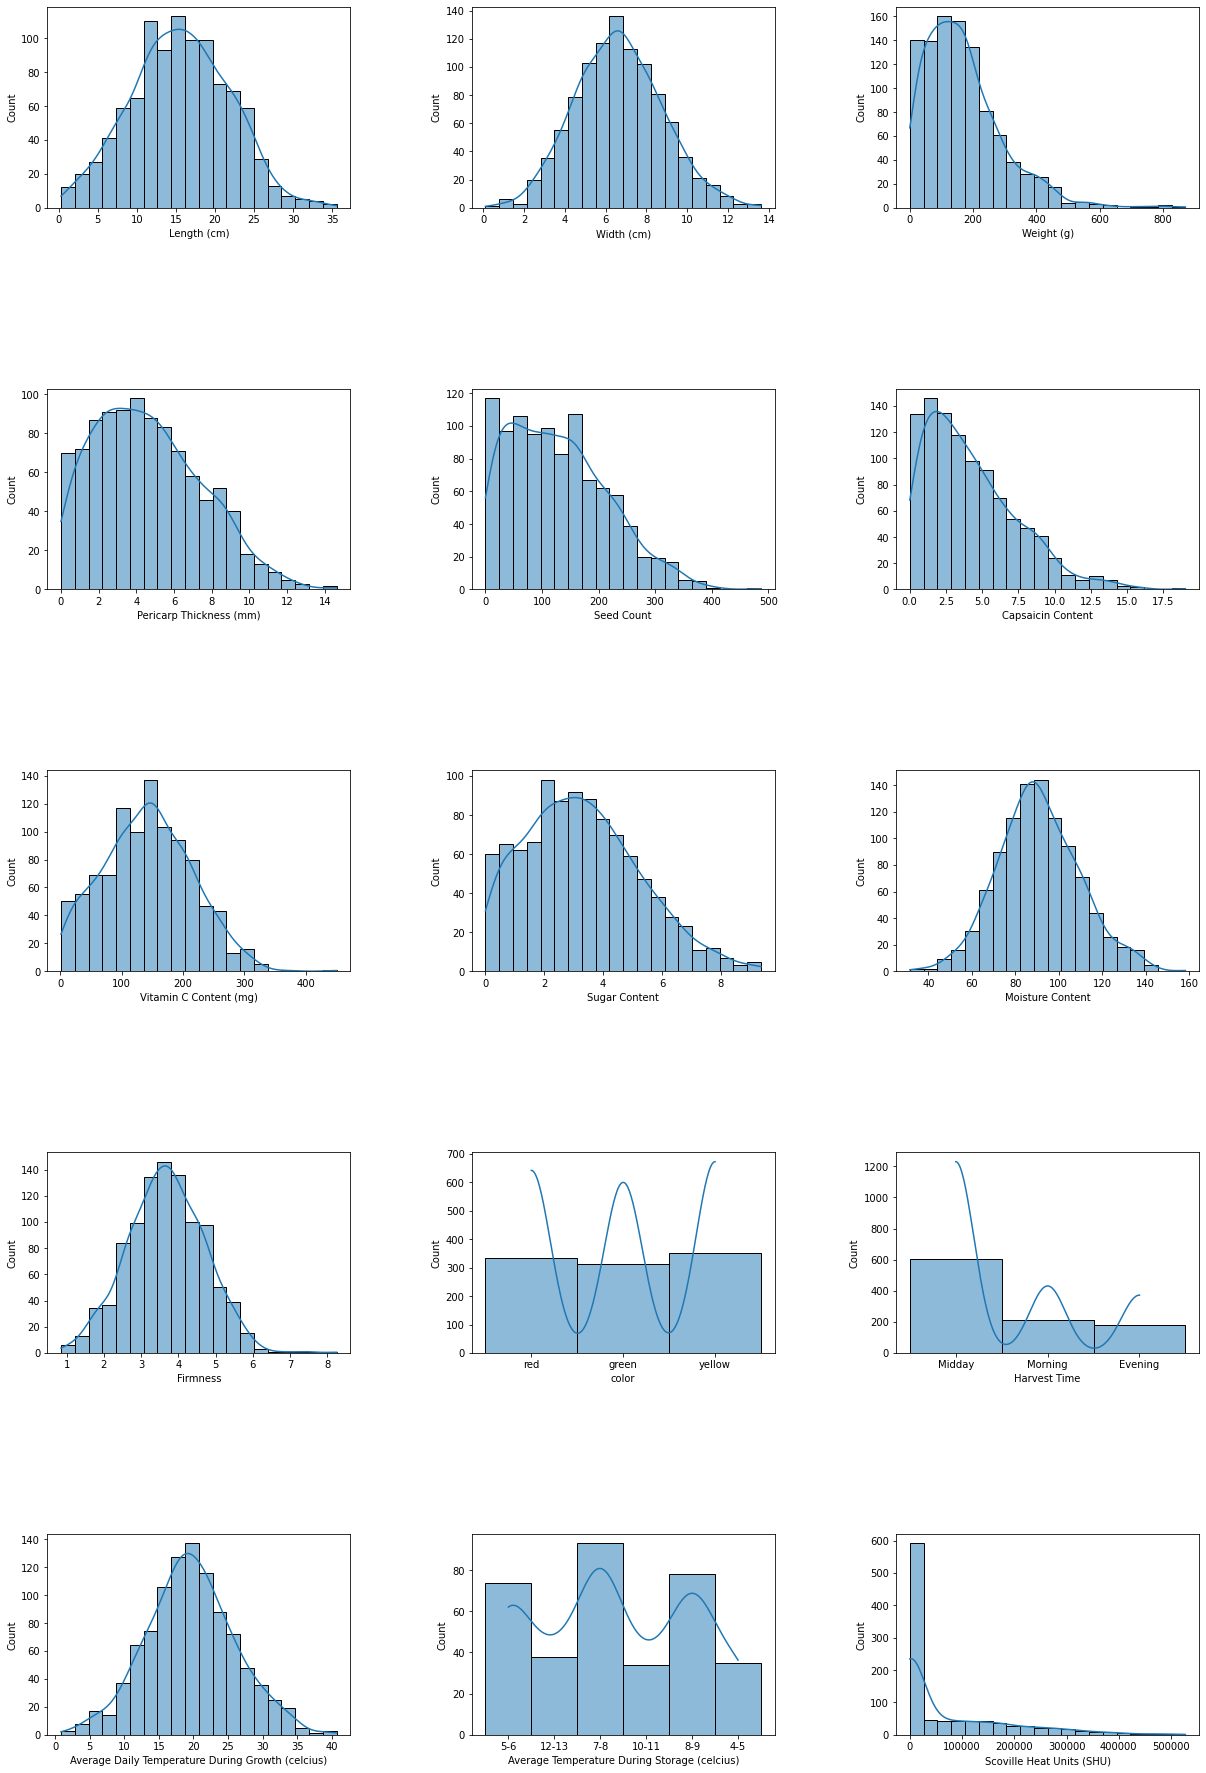

In [5]:
# Plotting the distribution for all of the collumns in our dataset.
column_names = train_df.columns
plot_dist_box(train_df, column_names)

##### Some comments about the distributions 

Width, Moisture Content and Average Daily Temperature During Growth almost seems to have perfect normal distrubutions. Firmness and Length also follows normal distribution, but skewed by a tiny amount to the right.

Weight, Pericarp Thickness, Seed Count, Capasicin Content, Vitamin C Content, Sugar Content and Scoville Heat Units have more of a right skewed distribution. 

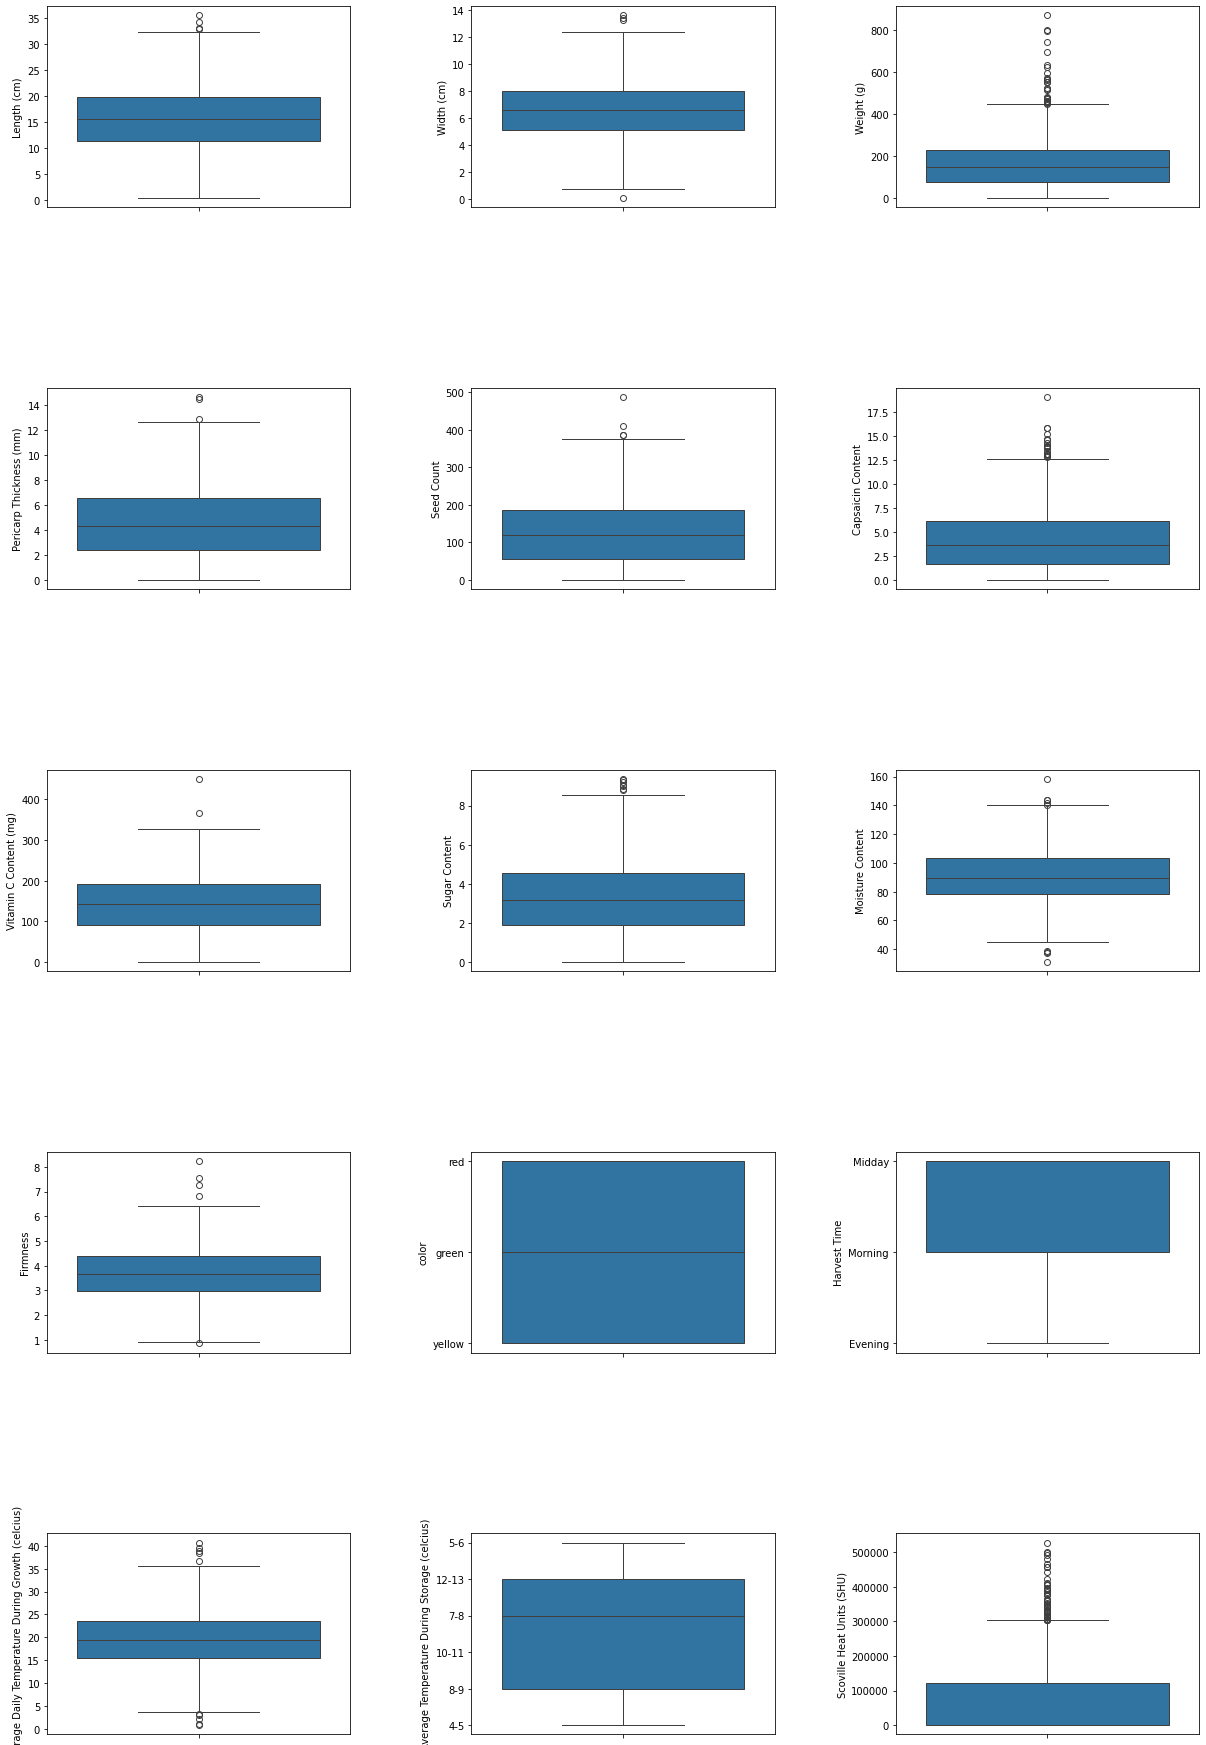

In [6]:
# Plotting a box plots for all of the collumns in our dataset.
plot_dist_box(train_df, column_names, dist=False, box=True)

##### Some comments about the box plots 

From the box plots of different features we see clearly that there are outliers that exist in our dataset. For example the 2 data points in Vitamin C Conetent feature, or many of the ones that are in weight.

In [7]:
# Cheking how many nan values exist in our train set.
train_df.isna().sum()

Length (cm)                                            1
Width (cm)                                             1
Weight (g)                                             1
Pericarp Thickness (mm)                                2
Seed Count                                             1
Capsaicin Content                                      1
Vitamin C Content (mg)                                 0
Sugar Content                                          1
Moisture Content                                       0
Firmness                                               1
color                                                  1
Harvest Time                                           0
Average Daily Temperature During Growth (celcius)      0
Average Temperature During Storage (celcius)         648
Scoville Heat Units (SHU)                              0
dtype: int64

In [8]:
# Checking how many nan values exist in our test set.
X_test.isna().sum()

Length (cm)                                            2
Width (cm)                                             0
Weight (g)                                             0
Pericarp Thickness (mm)                                0
Seed Count                                             0
Capsaicin Content                                      1
Vitamin C Content (mg)                                 0
Sugar Content                                          0
Moisture Content                                       1
Firmness                                               2
color                                                  0
Harvest Time                                           0
Average Daily Temperature During Growth (celcius)      0
Average Temperature During Storage (celcius)         522
dtype: int64

### Data cleaning and preprocessing

In [9]:
# Creating the features and target sets.
target = 'Scoville Heat Units (SHU)'
X = train_df.drop(columns=[target])
y = train_df[target]

#### Dealing with categorical data

The presence of categorical data in our sets requires us to either OneHotEncode them before training or use pipelines which will do it automatically for us. 

In [10]:
# Extracting the categorical column names in order to 
# use them in the pipeline later.
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['color', 'Harvest Time', 'Average Temperature During Storage (celcius)']

In [11]:
all_columns = X.columns

# Extracting the numerical columns, to use them later on in the piplines. 
numerical_columns = [col for col in all_columns if col not in categorical_columns]
numerical_columns

['Length (cm)',
 'Width (cm)',
 'Weight (g)',
 'Pericarp Thickness (mm)',
 'Seed Count',
 'Capsaicin Content',
 'Vitamin C Content (mg)',
 'Sugar Content',
 'Moisture Content',
 'Firmness',
 'Average Daily Temperature During Growth (celcius)']

#### Dealing with outliers

In [12]:
# This function returns the indices of the outliers that are in each 
# feature/column of our dataset.
def get_outliers(data, column_names):
    outlier_indices = []
    for i in column_names:
        z_score = (data[i] - np.mean(data[i])) / np.std(data[i])
        outliers = np.abs(z_score) > 3
        outlier_indices.extend(data.index[outliers])
        print("There are {0} number of outliers in feature {1}.".format(np.sum(outliers), i))
    unique_outliers = list(set(outlier_indices))
    print("Total number of outliers: ", len(unique_outliers))
    return unique_outliers

# I will be using these indices returned by the function remove_outliers,
# later on. In order to remove the outlier from the dataset.
outlier_indices = get_outliers(X, numerical_columns)

There are 1 number of outliers in feature Length (cm).
There are 4 number of outliers in feature Width (cm).
There are 14 number of outliers in feature Weight (g).
There are 2 number of outliers in feature Pericarp Thickness (mm).
There are 2 number of outliers in feature Seed Count.
There are 12 number of outliers in feature Capsaicin Content.
There are 2 number of outliers in feature Vitamin C Content (mg).
There are 3 number of outliers in feature Sugar Content.
There are 2 number of outliers in feature Moisture Content.
There are 4 number of outliers in feature Firmness.
There are 2 number of outliers in feature Average Daily Temperature During Growth (celcius).
Total number of outliers:  46


In [13]:
# Removing the outliers from our data.
X = X.drop(outlier_indices)
y = y.drop(outlier_indices)

#### OneHotEncoding and scaling using piplines 

#### Dealing with NaN values

There seems to be alot of NaN values in the feature, "Average Temperature During Storage (celcius)". Dropping all of the rows for which this feature has a NaN value would almost get rid of 65 percent of the data from our training set. We could either drop the entire feature from our train and test data sets, or we could use imputation to impute the missing values which according to the scikit learn documentation means "to infer them from known part of the data." (https://scikit-learn.org/stable/modules/impute.html)

In [14]:
# Defining a transformer for the numerical columns that are to be scaled.
numerical_transformer = Pipeline(steps=[
    ('imp_n', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA())
    
])

# Defining a transformer for the categorical columns that are to be onehot encoded.
categorical_transformer = Pipeline(steps=[
    ('imp_c', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# We then define a preprocessor so that we may pass it
# into our models pipelines later.
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_columns),
        ('categorical', categorical_transformer, categorical_columns)
    ]
 )

### Modelling

In [15]:
# Splitting the training data.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

#### Building Pipeline (A) PLSRegression

In [16]:
pipeline_pls = Pipeline([
    ('preprocessor', preprocessor),
    ('pls', PLSRegression())
])

pipeline_pls.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('imp_n', SimpleImputer()),
                                                    ('scaler', StandardScaler()),
                                                    ('pca', PCA())]),
                                    ['Length (cm)', 'Width (cm)', 'Weight (g)',
                                     'Pericarp Thickness (mm)', 'Seed Count',
                                     'Capsaicin Content', 'Vitamin C Content (mg)',
                                     'Sugar Content', 'Moisture Content',
                                     'Firmness',
                                     'Average Daily Temperature During Growth '
                                     '(celcius)']),
                                   ('categorical',
                                    Pipeline(steps=[('imp_c',
                                                     SimpleImput

In [17]:
pls_tols = [1e-04, 1e-05, 1e-07, 1e-08]
pls_range = [1, 2, 3, 4]

# Defining our PLSRegression parameter grid.
param_grid_pls = [
    {
        'pls__n_components': pls_range,
        'pls__tol': pls_tols
    }
]

# Performing grid search cross validation with our pipeline_log_reg and the param_grid_lr.
grid_search_pls = GridSearchCV(
    estimator=pipeline_pls,
    param_grid=param_grid_pls,
    scoring='neg_mean_absolute_error',
    cv=10,
    n_jobs=-1
)

In [18]:
# Performing grid search on the training data.
gs_pls_result = grid_search_pls.fit(X_train, y_train)
print(grid_search_pls.best_score_)
print(grid_search_pls.best_params_)

-70940.67338197844
{'pls__n_components': 4, 'pls__tol': 0.0001}


In [19]:
# Extracting the best estimator from our model 
# and using it on the validation data.
pls_best = gs_pls_result.best_estimator_
pls_best.fit(X_train, y_train)
y_pred = pls_best.predict(X_val)
# Calculating MAE
mean_absolute_error(y_val, y_pred)

68784.10266334798

##### LinearRegression with PCA 

In [20]:
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('lin_reg', LinearRegression(n_jobs=-1))
])
    
pipeline_lr.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('imp_n', SimpleImputer()),
                                                    ('scaler', StandardScaler()),
                                                    ('pca', PCA())]),
                                    ['Length (cm)', 'Width (cm)', 'Weight (g)',
                                     'Pericarp Thickness (mm)', 'Seed Count',
                                     'Capsaicin Content', 'Vitamin C Content (mg)',
                                     'Sugar Content', 'Moisture Content',
                                     'Firmness',
                                     'Average Daily Temperature During Growth '
                                     '(celcius)']),
                                   ('categorical',
                                    Pipeline(steps=[('imp_c',
                                                     SimpleImput

In [21]:
pca_range = [0.84, 0.95, 0.97]

param_grid_lr = [{
    'preprocessor__numerical__pca__n_components': pca_range
}]

grid_search_lr = GridSearchCV(estimator=pipeline_lr,
                             param_grid=param_grid_lr,
                             cv=10, 
                             scoring='neg_mean_absolute_error',
                             n_jobs=-1)

In [22]:
gs_lr_result = grid_search_lr.fit(X_train, y_train)
print(gs_lr_result.best_score_)
print(gs_lr_result.best_params_)

-70479.75661415422
{'preprocessor__numerical__pca__n_components': 0.84}


In [23]:
lr_best = gs_lr_result.best_estimator_
lr_best.fit(X_train, y_train)
y_lr_pred_val = lr_best.predict(X_val)
mean_absolute_error(y_val, y_lr_pred_val)

68771.36779216121

##### Building pipeline (B) RandomForestClassifier

Text(0.5, 1.0, 'Scoville Heat Units (SHU) Distrubution')

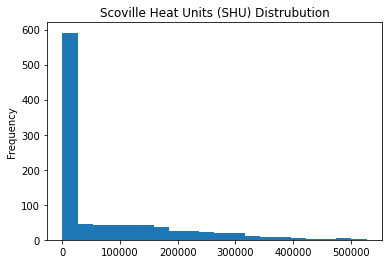

In [24]:
# I am going to create a copy of my original training set.
train_bin = train_df.copy()

# This code is like the code of 04_binning.ipynb. Credits is due to Timmo.
target = 'Scoville Heat Units (SHU)'
train_bin[target].plot.hist(bins=20).set_title('Scoville Heat Units (SHU) Distrubution')

[     0 432108  66874  29719 147823  77110 276475 157704 166245  58615
 177254  19455 112185  70357  95550 139678  11073  65587 171562  65067
  62490  10172 107795 287599  78741  15854 432624  89968 233770 101095
  39641  65290   7797 309904  84096 157684  82222  85539 167172 273311
 364660 291115 251131  91500  35256 172834 111458 133879 198388 173179
 327311  74610 184236 207744 356105 296592  27585 325317 125460 167752
  58987   6716  32040 175253 214232 215250 194372 234977 108344 102043
 144588 103984  84638 272898 126441  14678 130518 184130  75880 124155
 325535  52444 219680 169990 148287 117246  64004  30626 326484  48005
  42585 119457 170738 257467 127130 188240 230842 278771   6106 249528
 147943  91151 167749 324398  22186 145222 218160  71631  45280 124393
 375753 266060 170238 188279 242253 118905 131610  95980 158035 203647
   1714 306173 180623 145929 211109  40922  14965 149133  73551  85267
  19013 270561  57206 164227 146876 225338  98736 123540 112518  44556
 27875

<Axes: ylabel='Frequency'>

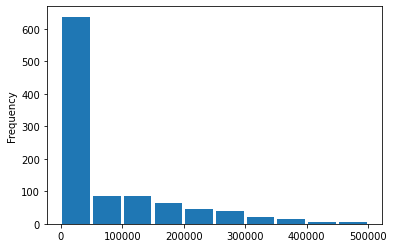

In [25]:
# This code is like the code of 04_binning.ipynb. Credits is due to Timmo.
num_bins = 500000
train_bin[target], bins = pd.cut(train_bin[target],
                                 num_bins, labels=False, 
                                 retbins=True) # include_lowest=True)
bins_edges = np.unique(bins)
print(train_bin[target].unique())
train_bin[target].plot.hist(rwidth=0.9)

In [26]:
X_bin = train_bin.drop(columns=target) 
y_bin = train_bin[target]

In [27]:
# Creating test validation splits.
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_bin, y_bin, test_size=0.3)

In [28]:
# Defining our RandomForestClassifier pipeline.
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier())
])

pipeline_rf.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('imp_n', SimpleImputer()),
                                                    ('scaler', StandardScaler()),
                                                    ('pca', PCA())]),
                                    ['Length (cm)', 'Width (cm)', 'Weight (g)',
                                     'Pericarp Thickness (mm)', 'Seed Count',
                                     'Capsaicin Content', 'Vitamin C Content (mg)',
                                     'Sugar Content', 'Moisture Content',
                                     'Firmness',
                                     'Average Daily Temperature During Growth '
                                     '(celcius)']),
                                   ('categorical',
                                    Pipeline(steps=[('imp_c',
                                                     SimpleImput

In [29]:
n_estimators_range = [100, 250, 350]
max_depth_range = [None, 2, 6]

# Defining the parameter grid, 
# which will be passed into GridSearchCV in order to find optimal parameters.
param_grid_rf = [{
    'preprocessor__numerical__pca__n_components': pca_range,
    'rf__n_estimators': n_estimators_range,
    'rf__max_depth': max_depth_range
}]

grid_search_rf = GridSearchCV(estimator=pipeline_rf,
                             param_grid=param_grid_rf,
                             cv=10,
                             scoring='neg_mean_absolute_error')

In [30]:
gs_rf_result = grid_search_rf.fit(X_train_b, y_train_b)
print(gs_rf_result.best_score_)
print(gs_rf_result.best_params_)

/home/idris/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


-63965.67428571428
{'preprocessor__numerical__pca__n_components': 0.84, 'rf__max_depth': None, 'rf__n_estimators': 350}


In [31]:
rf_best = gs_rf_result.best_estimator_
rf_best.fit(X_train_b, y_train_b)
y_pred_rf_val = rf_best.predict(X_val_b)
mean_absolute_error(y_pred_rf_val, y_val_b)

72015.00333333333

##### Number of bins 

I noticed that using large number of bins resulted in a very high MAE for the validation set. And using a small number of bins resulted in a very small MAE. However when both of the predictions where uploaded to kaggle it gave a poor MAE. Using 500000 bins gave me the best results.

#### Building pipeline (C)

This task was a little bit confusing for me, but here is my thought process. First I will use the training set in order create a new discrete target variable Spicy which will be based on the SHU of the peppers. So if the the SHU > 0, than it will say 1 and if SHU <= 0 than it will say 0. For the second step I will use the peppers that were classified as spicy to estimate their SHU, using a regression model. Lastly I will combine the result of both models.

In [32]:
def separate_peppers(SHU):
    if SHU > 0:
        return 1
    if SHU <= 0:
        return 0
        

# Lets start by identifying the bell peppers apart from the spicy peppers in our training set.
train_df['Spicy'] = train_df[target].apply(separate_peppers)
train_df.head()

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,color,Harvest Time,Average Daily Temperature During Growth (celcius),Average Temperature During Storage (celcius),Scoville Heat Units (SHU),Spicy
0,17.37,5.42,94.30,4.90,193.93,3.21,173.59,6.15,88.59,3.40,red,Midday,8.68,5-6,0.00,0
1,27.78,4.75,262.71,6.56,186.29,8.19,100.41,2.36,111.20,5.45,green,Midday,22.44,NaN,0.00,0
2,6.17,3.51,66.72,7.96,298.81,4.69,125.91,6.75,72.98,2.77,red,Midday,24.99,NaN,455995.06,1
3,6.12,6.07,51.24,4.57,39.36,2.76,143.54,5.93,63.93,1.62,yellow,Midday,13.05,NaN,0.00,0
4,28.58,4.84,166.51,3.07,194.07,7.01,193.76,2.85,88.19,3.99,red,Midday,27.08,NaN,0.00,0


In [33]:
new_target = 'Spicy'
X_s = train_df.drop(columns=[target, new_target])
y_s = train_df[new_target]

In [34]:
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_s, y_s, test_size=0.25)

I will be using the same RandomForestClassifier as I used for pipeline (B). I will only change the scoring in GridSearchCV to 'accuracy'.

In [35]:
grid_search_rf2 = GridSearchCV(estimator=pipeline_rf,
                             param_grid=param_grid_rf,
                             cv=10,
                             scoring='accuracy',
                             n_jobs=-1)

gs_rf_result2 = grid_search_rf2.fit(X_train_s, y_train_s)
print(gs_rf_result2.best_score_)
print(gs_rf_result2.best_params_)

0.8773333333333333
{'preprocessor__numerical__pca__n_components': 0.84, 'rf__max_depth': None, 'rf__n_estimators': 250}


In [36]:
rf_best2 = gs_rf_result2.best_estimator_
rf_best2.fit(X_train_s, y_train_s)
rf_best2.score(X_val_s, y_val_s)

0.84

In [37]:
rf_best2.fit(X_s, y_s)
# This will give me the predictions for spicy and not spicy on the test set.
y_test_s = rf_best2.predict(X_test)

In [38]:
# I will add the the predicted spicy peppers to our test dataset.
X_test[new_target] = y_test_s
X_test.head()

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,color,Harvest Time,Average Daily Temperature During Growth (celcius),Average Temperature During Storage (celcius),Spicy
0,20.60,6.92,90.98,3.55,2.25,0.89,128.00,6.64,75.72,4.33,red,Midday,28.05,7-8,0
1,9.38,11.84,130.67,0.51,2.92,4.86,158.31,1.45,121.15,3.95,yellow,Midday,18.89,NaN,1
2,7.65,3.87,78.76,8.88,125.27,3.55,96.85,3.80,133.85,3.35,yellow,Midday,15.87,NaN,0
3,9.04,7.89,149.76,5.26,284.68,3.86,231.46,4.99,109.73,5.50,red,Midday,19.51,NaN,0
4,9.80,6.65,127.25,1.38,126.19,12.60,174.90,5.33,104.12,1.61,red,Midday,23.61,NaN,1


In [39]:
# Now I will separate the predicted bell peppers from the spicy peppers.
bell_peppers_data = X_test.drop(X_test[X_test[new_target] == 1].index)
spicy_peppers_data = X_test.drop(X_test[X_test[new_target] == 0].index)

In [40]:
# I remove the Spicy target as it does not originally exist in our train and test sets.
spicy_peppers_data = spicy_peppers_data.drop(columns=[new_target])
# I will train the LinearRegression model on the spicy dataset.
y_spicy_pred = lr_best.predict(spicy_peppers_data)

In [41]:
# I rename the column Spicy to SHU, because for bell peppers 0 is their SHU.
bell_peppers_data = bell_peppers_data.rename(columns={'Spicy':'Scoville Heat Units (SHU)'})
# Assigning the predicted SHU for the spicy peppers back to our data set.
spicy_peppers_data['Scoville Heat Units (SHU)'] = y_spicy_pred
# Combining the bell and spicy peppers data sets.
combined_data = pd.concat([bell_peppers_data, spicy_peppers_data])
# Sorting them based on their indices, so as to preserve the original order of the data set.
combined_data = combined_data.sort_index(axis=0)
combined_data

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,color,Harvest Time,Average Daily Temperature During Growth (celcius),Average Temperature During Storage (celcius),Scoville Heat Units (SHU)
0,20.60,6.92,90.98,3.55,2.25,0.89,128.00,6.64,75.72,4.33,red,Midday,28.05,7-8,0.000000
1,9.38,11.84,130.67,0.51,2.92,4.86,158.31,1.45,121.15,3.95,yellow,Midday,18.89,NaN,139951.094426
2,7.65,3.87,78.76,8.88,125.27,3.55,96.85,3.80,133.85,3.35,yellow,Midday,15.87,NaN,0.000000
3,9.04,7.89,149.76,5.26,284.68,3.86,231.46,4.99,109.73,5.50,red,Midday,19.51,NaN,0.000000
4,9.80,6.65,127.25,1.38,126.19,12.60,174.90,5.33,104.12,1.61,red,Midday,23.61,NaN,165317.972506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,11.84,5.98,161.03,4.57,10.84,9.97,186.23,0.55,103.35,3.42,yellow,Midday,21.12,NaN,136372.759711
796,16.55,11.89,394.41,3.80,87.69,2.40,100.54,4.67,100.41,3.61,red,Morning,17.44,NaN,0.000000
797,9.39,3.32,63.43,1.77,10.32,2.65,232.88,2.56,83.58,3.92,yellow,Midday,21.70,NaN,91345.879832
798,7.77,7.50,59.13,2.70,142.91,0.24,126.11,4.51,83.68,3.75,green,Midday,22.73,NaN,66277.439208


### Final evaluation

Here I am taking the best parameters for the PLSRegression, LinearRegression and RandomForestClassifier models and training it on the entire dataset. And then I do a final prediction on the real test dataset.

In [42]:
# Training our best PLSRegression model on the entire dataset. (Pipeline (A)) 
pls_best.fit(X, y)
# Making predictions for our best PLSRegression model on the test set.
y_pred_pls = pls_best.predict(X_test)

In [43]:
# Training our best LinearRegression model on the entire dataset. (Pipeline (A)) 
lr_best.fit(X, y)
# Making predictions for our best LinearRegression model on the test set.
y_pred_lr = lr_best.predict(X_test)

In [44]:
# Training our best RandomForestClassifier model on the entire binned dataset. (Pipeline (B))
rf_best.fit(X_bin, y_bin)
# Making predictions for our best RandomForestClassifier model on the test set.
y_pred_rf = rf_best.predict(X_test)

In [45]:
# Here I extract the combined predicted SHU. (Pipeline (C))
y_combined = combined_data[target]
y_combined

0           0.000000
1      139951.094426
2           0.000000
3           0.000000
4      165317.972506
           ...      
795    136372.759711
796         0.000000
797     91345.879832
798     66277.439208
799         0.000000
Name: Scoville Heat Units (SHU), Length: 800, dtype: float64

### Kaggle submission

In [46]:
# Submission for the PLSRegression model.
y_csv_pls = np.savetxt('y_pred_pls.csv', np.dstack((np.arange(0, y_pred_pls.size),y_pred_pls))[0], header="index,Scoville Heat Units (SHU)", comments='', fmt='%d,%s')

In [47]:
# Submission for the LinearRegression model.
y_csv_lr = np.savetxt('y_pred_lr.csv', np.dstack((np.arange(0, y_pred_lr.size), y_pred_lr))[0], header='index,Scoville Heat Units (SHU)', comments='', fmt='%d,%s')

In [48]:
# Submission for Pipeline (B).
y_csv_rf = np.savetxt('y_pred_rf.csv', np.dstack((np.arange(0, y_pred_rf.size), y_pred_rf))[0], header='index,Scoville Heat Units (SHU)', comments='', fmt='%d,%s')

In [49]:
# Submission for Pipeline (C).
y_csv_combined = np.savetxt('y_combined.csv', np.dstack((np.arange(0, y_combined.size), y_combined))[0], header='index,Scoville Heat Units (SHU)', comments='', fmt='%d,%s')